## <center> CNN - Flower Power III </center>

#### Cornflower, Cow Parsley, Creeping Buttercup, Flatweed, Health Spotted Orchid, Marsh marigold, Meadow Buttercup, Meadow Thistl, Ox-eye Daisy and Southern Marsh Orchid

In [2]:
import os
import cv2
import numpy as np

#folders = ['Ox-eye Daisy', 'Marsh-marigold']
x = [] # Feature dataset with images
y = [] # Target dataset with labels


folder_dir = './Flower-Data_CNN'
size = 128 #Crop the image to 128x128
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("JPG"):
            y.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (size,size))
            x.append(im)
        else:
            continue

In [3]:
# split the dataset into 80% training and 20% test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [4]:
# take a look at one of the images:
X_train[0]

array([[[153, 178, 110],
        [152, 175, 111],
        [157, 179, 115],
        ...,
        [ 77, 100,  78],
        [ 93, 117, 101],
        [ 87, 113, 100]],

       [[142, 167, 101],
        [144, 167, 104],
        [149, 171, 107],
        ...,
        [ 69,  96,  75],
        [ 83, 111,  94],
        [ 80, 108,  96]],

       [[135, 160, 100],
        [136, 160, 101],
        [136, 160,  98],
        ...,
        [ 75, 104,  82],
        [ 80, 108,  92],
        [ 77, 105,  93]],

       ...,

       [[119, 122,  86],
        [163, 158, 123],
        [117, 114,  82],
        ...,
        [ 35,  55,  28],
        [ 34,  49,  30],
        [ 78,  86,  78]],

       [[ 71,  91,  52],
        [132, 139, 105],
        [177, 184, 150],
        ...,
        [ 37,  53,  32],
        [ 64,  75,  65],
        [119, 122, 125]],

       [[ 58,  88,  50],
        [ 64,  82,  47],
        [179, 194, 159],
        ...,
        [ 59,  71,  57],
        [109, 114, 113],
        [147, 147, 157]]

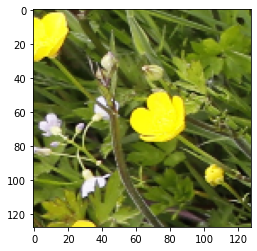

In [18]:
# Show the image
import matplotlib.pyplot as plt
img = plt.imshow(X_train[1])

In [19]:
# Print the label of the image above:
y_train[1]

'Creeping Buttercup'

In [20]:
# Convert all the labels in numerical values
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [21]:
y_train

array([6, 2, 1, ..., 3, 7, 9], dtype=int64)

In [22]:
import tensorflow as tf
y_train_one_hot = tf.one_hot(y_train, depth=10)
y_test_one_hot = tf.one_hot(y_test, depth=10)
y_train_one_hot

<tf.Tensor: shape=(1192, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [23]:
# Normalize the pixels in the images to be values between 0 and 1
X_train = np.array(X_train)/255
X_test= np.array(X_test)/255
X_train

array([[[[0.6       , 0.69803922, 0.43137255],
         [0.59607843, 0.68627451, 0.43529412],
         [0.61568627, 0.70196078, 0.45098039],
         ...,
         [0.30196078, 0.39215686, 0.30588235],
         [0.36470588, 0.45882353, 0.39607843],
         [0.34117647, 0.44313725, 0.39215686]],

        [[0.55686275, 0.65490196, 0.39607843],
         [0.56470588, 0.65490196, 0.40784314],
         [0.58431373, 0.67058824, 0.41960784],
         ...,
         [0.27058824, 0.37647059, 0.29411765],
         [0.3254902 , 0.43529412, 0.36862745],
         [0.31372549, 0.42352941, 0.37647059]],

        [[0.52941176, 0.62745098, 0.39215686],
         [0.53333333, 0.62745098, 0.39607843],
         [0.53333333, 0.62745098, 0.38431373],
         ...,
         [0.29411765, 0.40784314, 0.32156863],
         [0.31372549, 0.42352941, 0.36078431],
         [0.30196078, 0.41176471, 0.36470588]],

        ...,

        [[0.46666667, 0.47843137, 0.3372549 ],
         [0.63921569, 0.61960784, 0.48235294]

## Create and build the model

In [24]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [25]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation = "softmax"))

In [26]:
# Adding a learning rate
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [27]:
# compile 
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit(X_train,y_train_one_hot, batch_size=batch_size,
                              epochs = epochs,
                              validation_split=0.3,
                              verbose = 1)

Epoch 1/64
27/27 [==============================] - 42s 2s/step - loss: 2.1801 - accuracy: 0.2014 - val_loss: 1.8645 - val_accuracy: 0.3408
Epoch 2/64
27/27 [==============================] - 43s 2s/step - loss: 1.8093 - accuracy: 0.3513 - val_loss: 1.4330 - val_accuracy: 0.5196
Epoch 3/64
27/27 [==============================] - 42s 2s/step - loss: 1.6448 - accuracy: 0.4161 - val_loss: 1.3257 - val_accuracy: 0.5810
Epoch 4/64
27/27 [==============================] - 42s 2s/step - loss: 1.4981 - accuracy: 0.4532 - val_loss: 1.1096 - val_accuracy: 0.7179
Epoch 5/64
27/27 [==============================] - 42s 2s/step - loss: 1.2866 - accuracy: 0.5444 - val_loss: 1.0335 - val_accuracy: 0.7039
Epoch 6/64
27/27 [==============================] - 44s 2s/step - loss: 1.1817 - accuracy: 0.5779 - val_loss: 0.9874 - val_accuracy: 0.6480
Epoch 7/64
27/27 [==============================] - 44s 2s/step - loss: 1.0944 - accuracy: 0.6271 - val_loss: 0.8494 - val_accuracy: 0.7151
Epoch 8/64
27/27 [==

27/27 [==============================] - 43s 2s/step - loss: 0.1167 - accuracy: 0.9496 - val_loss: 0.3012 - val_accuracy: 0.9385
Epoch 60/64
27/27 [==============================] - 43s 2s/step - loss: 0.0942 - accuracy: 0.9688 - val_loss: 0.2460 - val_accuracy: 0.9525
Epoch 61/64
27/27 [==============================] - 46s 2s/step - loss: 0.0945 - accuracy: 0.9676 - val_loss: 0.2923 - val_accuracy: 0.9469
Epoch 62/64
27/27 [==============================] - 46s 2s/step - loss: 0.1077 - accuracy: 0.9628 - val_loss: 0.2748 - val_accuracy: 0.9497
Epoch 63/64
27/27 [==============================] - 45s 2s/step - loss: 0.1463 - accuracy: 0.9412 - val_loss: 0.3148 - val_accuracy: 0.9330
Epoch 64/64
27/27 [==============================] - 46s 2s/step - loss: 0.0932 - accuracy: 0.9652 - val_loss: 0.3383 - val_accuracy: 0.9302


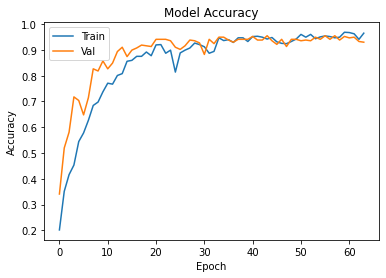

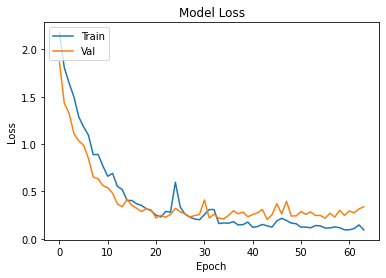

In [28]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [29]:
# Prediction
predict_model = model.predict(np.array(X_train))
predict_model = np.argmax(predict_model, axis=1)
predict_model

array([6, 2, 1, ..., 5, 7, 9], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_train, y_pred = predict_model)

In [41]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=60)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
cm_plot_labels = ['Cornflower', 'Cow Parsley', 'Creeping Buttercup', 'Flatweed', 'Heath Spotted Orchid', 'Marsh marigold', 'Meadow Buttercup',
                              'Meadow Thistle' ,'Ox-eye Daisy', 'Southern Marsh Orchid']

Confusion matrix, without normalization
[[ 33   0   0   0   0   0   0   1   0   0]
 [  0 202   0   0   4   0   0   0   0   0]
 [  0   0  99   0   0   8   0   0   0   0]
 [  0   0   2 102   0   3   0   0   0   0]
 [  0   0   0   0 115   0   0   0   0   0]
 [  0   0   1   1   0 103   0   0   0   0]
 [  0   0   0   2   0   0 106   0   1   0]
 [  0   0   0   0   0   0   0 173   0   0]
 [  0   0   1   0   1   0   0   0  67   0]
 [  0   0   0   0   0   0   0   0   0 167]]


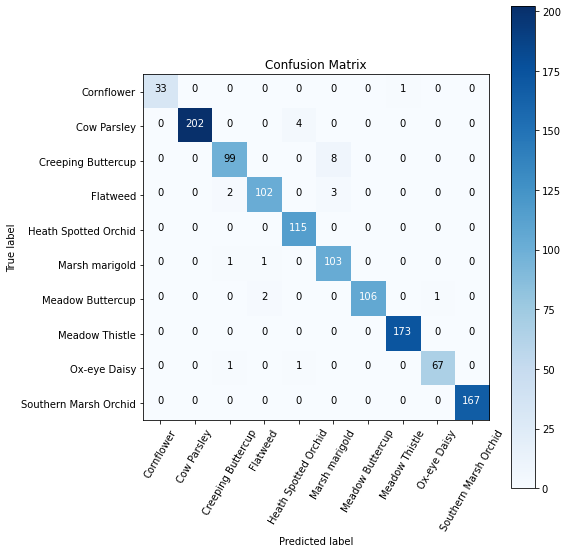

In [43]:
import itertools
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Evaluate the model on the dataset

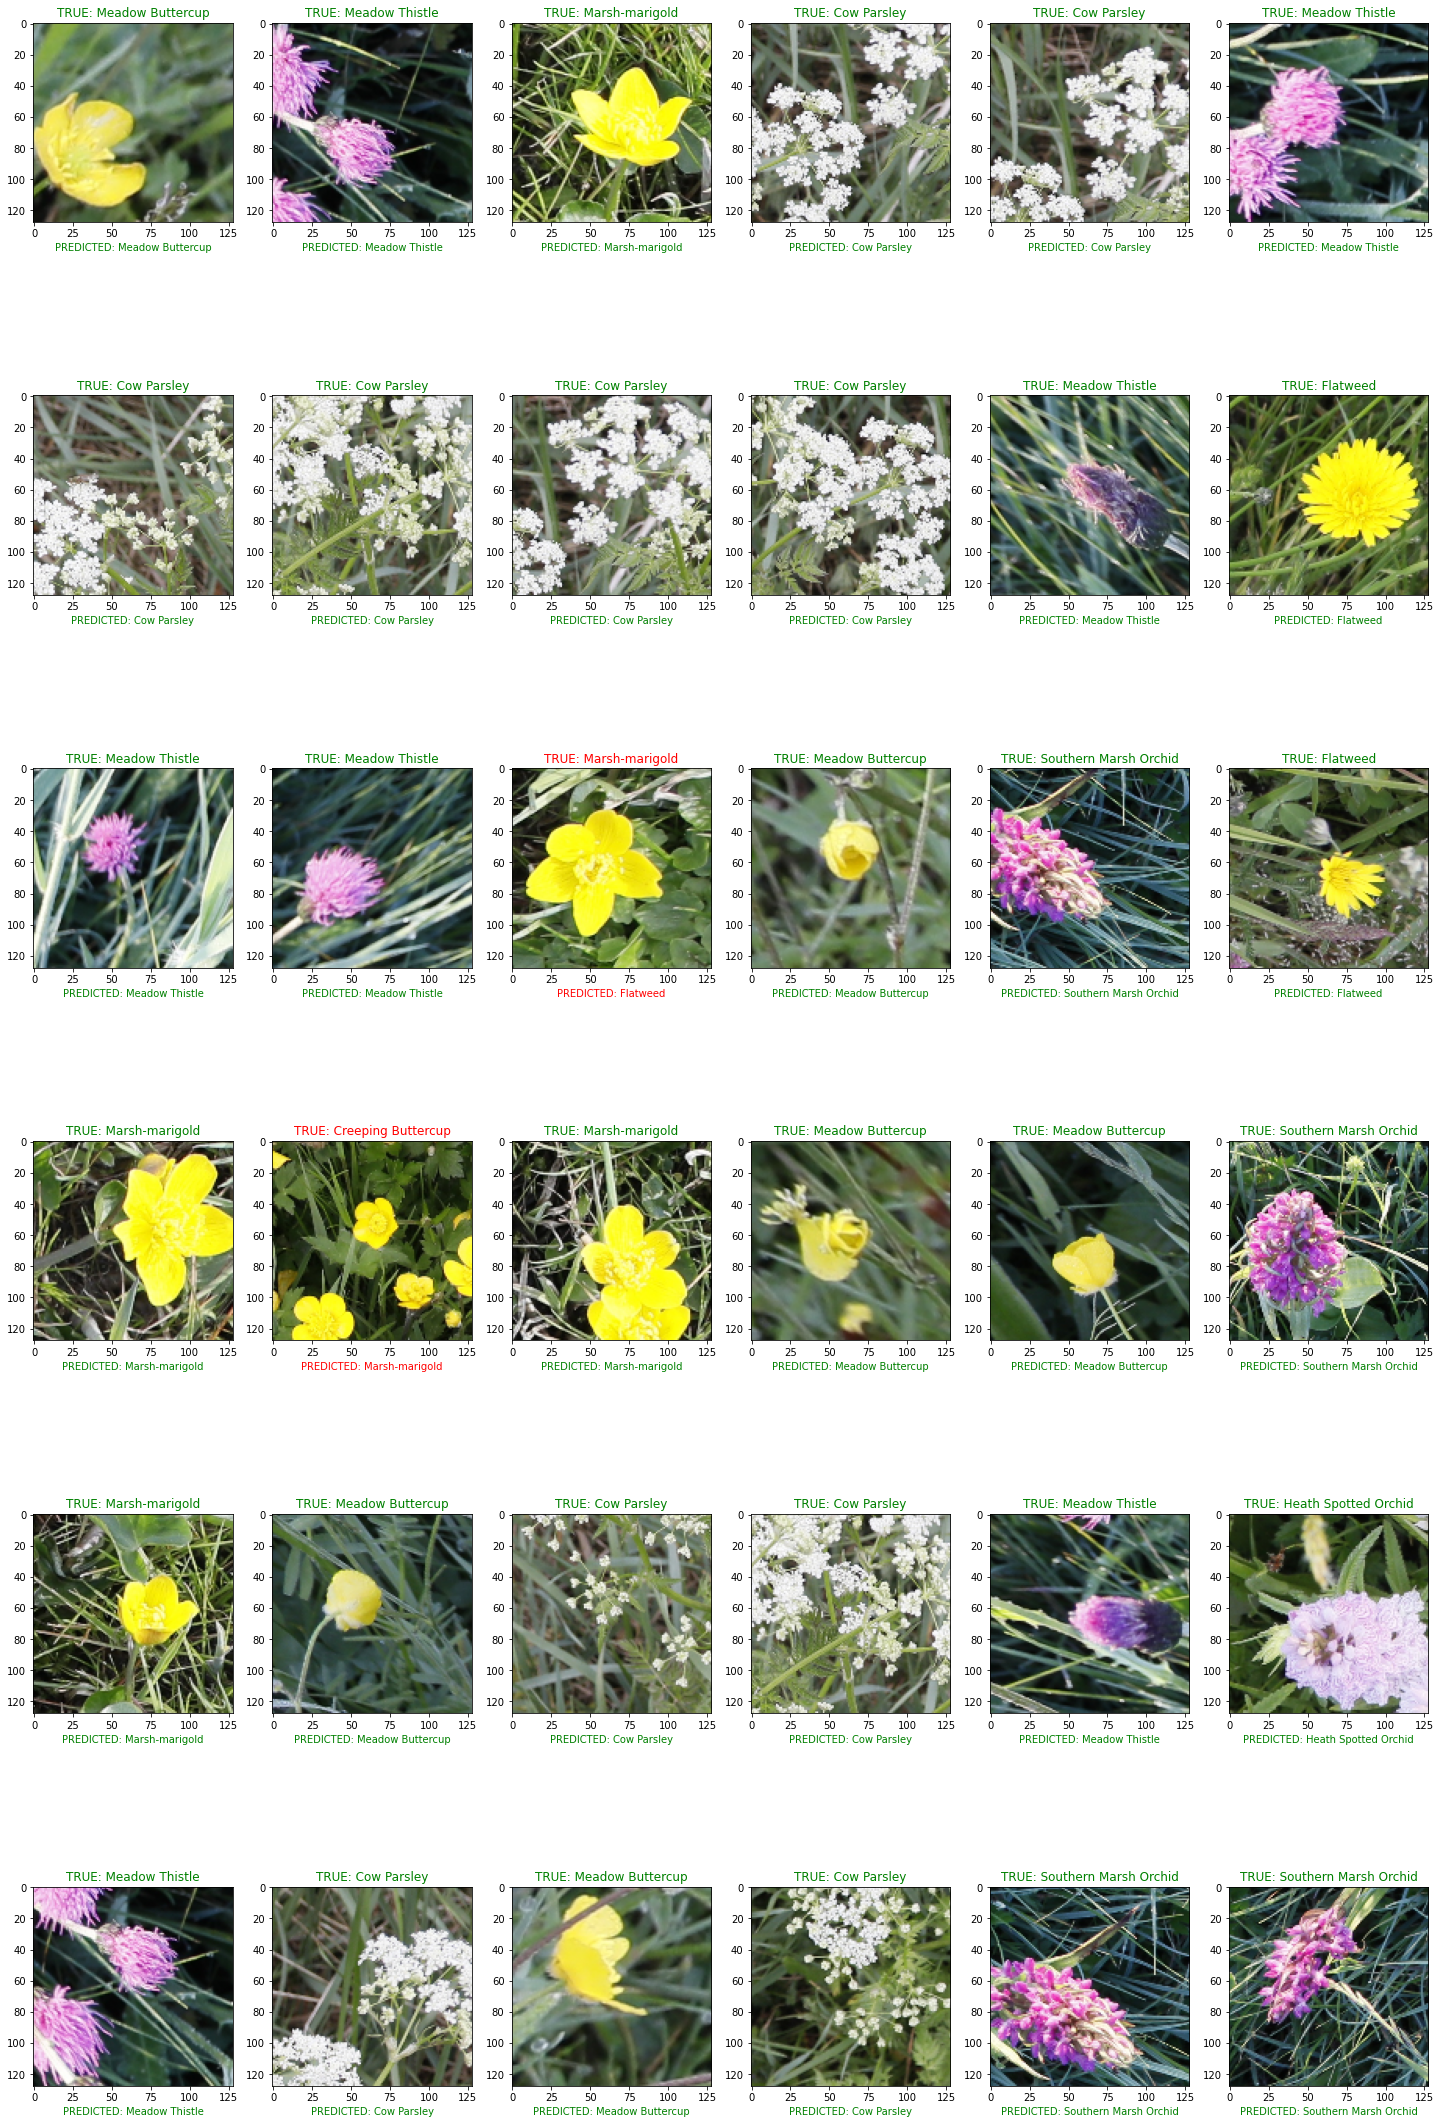

In [44]:
import matplotlib.pyplot as plt
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test_one_hot[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [45]:
y_test[12]

1

### Evaluate the model on 2 new images 

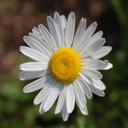

In [92]:
import PIL.Image as Image
SIZE = (128,128)
#insert new Daisy image
new_im = Image.open('Daisy.jpg').resize(SIZE)
new_im

In [93]:
new_im = np.array(new_im)/255
new_im[np.newaxis, ...].shape
result = model.predict(new_im[np.newaxis, ...])
#predict on the new daisy image
predic_label_index = np.argmax(result)
predic_label_index

1

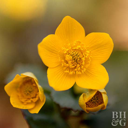

In [94]:
im = Image.open('Marsh.jpg').resize(SIZE)
im

In [95]:
im = np.array(im)/255
im[np.newaxis, ...].shape
result1 = model.predict(im[np.newaxis, ...])
predic_label_index1 = np.argmax(result1)
predic_label_index1

0

Label 0 is for Marsh-marigold and label 1 is for Daisy.